In [1]:
import gym

import mdptoolbox, mdptoolbox.example

import time

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt 

from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp

from itertools import accumulate
import math

### Forest Problem (Non GridWorld Example)

- Creates transition probability P, size (Action X State X State)
- Creates Reward Matrix R, size (State X Action)
- Action is either WAIT (Action = 0) or CUT (Action = 1). There is some probability p that the fire burns the forest. 
- The states of the forest are the ages of how old the forest is since last cut or burn, where S = {0, 1, ..., S-1}

- S: The number of states, the number of years old the forest can be 
- r1: the reward when the forest is in its oldest state and action WAIT is performed 
- r2: the reward whne the forest is in its oldest state and action CUT is performed
- p: the probability that a wild fire occurs 

State Size 100

In [2]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()
#print(vi.policy)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()
#print(ql.policy)

[{'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 14.1448095376563, 'Time': 0.01111292839050293, 'Max V': 23.172433847048566, 'Mean V': 5.203547542890375, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 10.904809537656298, 'Time': 0.012465953826904297, 'Max V': 23.172433847048566, 'Mean V': 5.344995638266938, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 8.2804095376563, 'Time': 0.013705015182495117, 'Max V': 23.172433847048566, 'Mean V': 5.454043733643501, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 6.1546455376563, 'Time': 0.014754056930541992, 'Max V': 23.172433847048566, 'Mean V': 5.536847829020064, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 4.4327766976562994, 'Time': 0.01572704315185547, 'Max V': 23.172433847048566, 'Mean V': 5.598394284396627, 'Iteration': 5}, {'State': None, 'Action': Non

In [3]:
#print(P[0, :, :])

In [4]:
# Take action 0, while in State 0, and end up with these transition probabilities to these states: 10% to 0, 90% to state 1
P[0, 0, :]

array([0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Policy Iteration Final Iteration

In [5]:
pi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.172433847048566,
 'Error': 1.7763568394002505e-15,
 'Time': 0.021266937255859375,
 'Max V': 23.172433847048566,
 'Mean V': 5.704639509766346,
 'Iteration': 10}

In [6]:
vi_result

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0001850128173828125,
  'Max V': 4.0,
  'Mean V': 1.02,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 0.0003299713134765625,
  'Max V': 7.24,
  'Mean V': 1.0829,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6244,
  'Time': 0.0004401206970214844,
  'Max V': 9.9373,
  'Mean V': 1.8543879999999995,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.128674000000002,
  'Error': 2.1257640000000015,
  'Time': 0.000576019287109375,
  'Max V': 12.128674000000002,
  'Mean V': 1.9937819699999997,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 13.957421530000001,
  'Error': 1.721868840000001,
  'Time': 0.0006661415100097656,
  'Max V': 13.957421530000001,
  'Mean V': 2.5784792630999998,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 15.448326111400002,
  'Error': 1.394713

Value Iteration Final Iteration

In [7]:
vi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.089675091923866,
 'Error': 0.0013319585461291084,
 'Time': 0.003951072692871094,
 'Max V': 23.089675091923866,
 'Mean V': 5.626418022627985,
 'Iteration': 39}

Q Learning Final Iteration

In [8]:
ql_result[-1]

{'State': 6,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 0.5076100826263428,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 2.8049675714934863,
 'Mean V': 0.06607533748167926,
 'Iteration': 10000}

In [9]:
def chart_reward_iter(results, title):
    iter_list = []
    result_list = []

    for i in range(0, len(results)):
        iter_list.append(results[i]['Iteration'])
        result_list.append(results[i]['Reward'])

    plt.plot(iter_list, result_list)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title(title)
    plt.show()

In [10]:
def compare_reward1(pi, vi, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_meanv_list = []
    pi_time_list = []
    vi_iter_list = []
    vi_reward_list = []
    vi_meanv_list = []
    vi_time_list = []
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_meanv_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_meanv_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Max Reward")
    plt.title("Iteration vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Max Reward")
    plt.title("Time vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Time vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show() 
    
    plt.clf()
    plt.plot(pi_iter_list, pi_cumsum_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_cumsum_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Time")
    plt.title("Iteration vs. Cumulative Time in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    
    

In [95]:
def compare_reward(pi, vi, ql, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_meanv_list = []
    pi_time_list = []
    vi_iter_list = []
    vi_reward_list = []
    vi_meanv_list = []
    vi_time_list = []
    
    ql_iter_list = []
    ql_reward_list = []
    ql_meanv_list = []
    ql_time_list = []
    
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_meanv_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_meanv_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    for i in range(0, len(ql)):
        ql_iter_list.append(ql[i]['Iteration'])
        ql_reward_list.append(ql[i]['Reward'])
        ql_meanv_list.append(ql[i]['Mean V'])
        ql_time_list.append(ql[i]['Time'])
    ql_cumsum_list = list(accumulate(ql_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Max Reward")
    plt.title("Iteration vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Max Reward")
    plt.title("Time vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Time vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show() 
    
    plt.clf()
    plt.plot(pi_iter_list, pi_cumsum_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_cumsum_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Time")
    plt.title("Iteration vs. Cumulative Time in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_iter_list, ql_reward_list, label = "Q Learning Max Reward")
    plt.plot(ql_iter_list, ql_meanv_list, label = "Q Learning Mean Reward")
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Iteration vs. Reward in Q Learning \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_iter_list, ql_meanv_list, label = "Q Learning")
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Q Learning, Policy, Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_time_list, ql_meanv_list, label = "Q Learning")
    plt.plot(pi_time_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_time_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Cumulative Time vs. Mean Reward in Q Learning, Policy, Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()

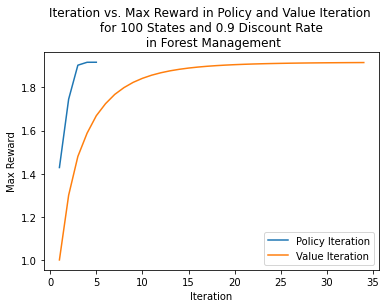

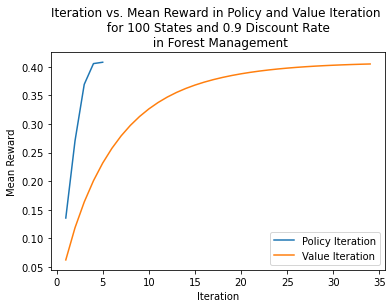

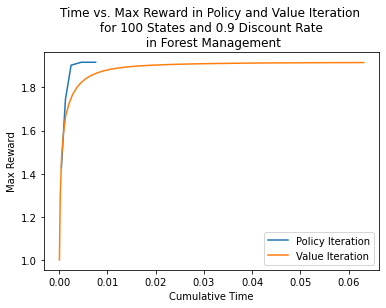

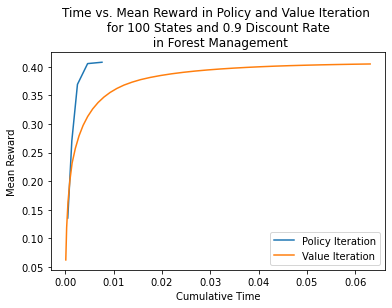

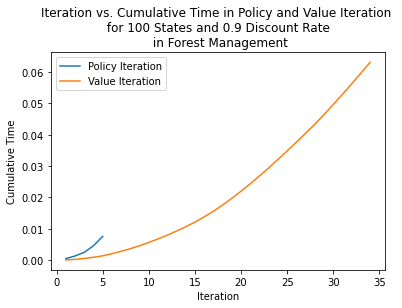

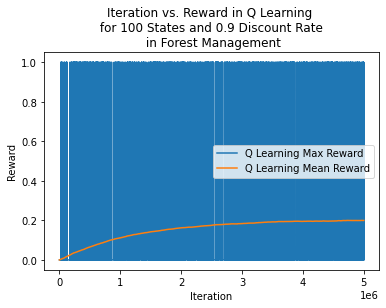

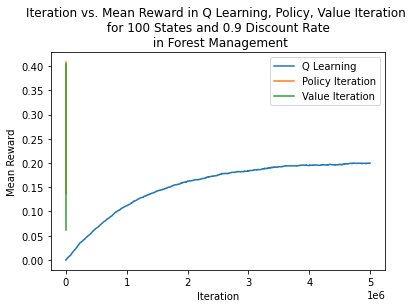

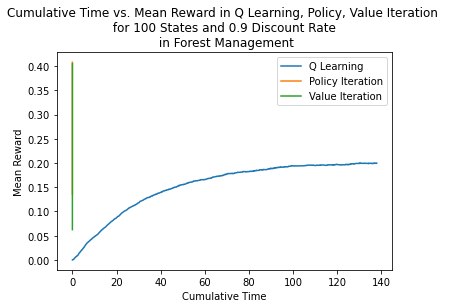

In [96]:
compare_reward(pi_result, vi_result, ql_result, 100, .90, "Forest Management")

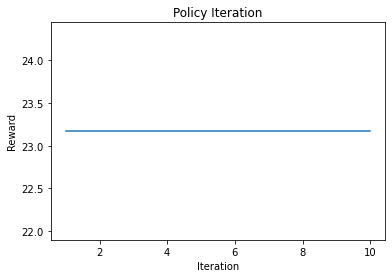

In [12]:
chart_reward_iter(pi_result, "Policy Iteration")

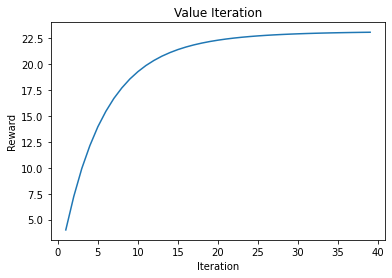

In [13]:
chart_reward_iter(vi_result, "Value Iteration")

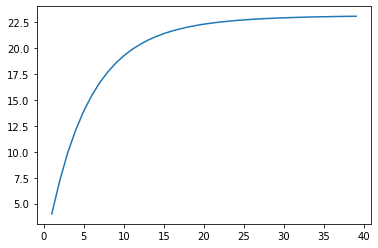

In [14]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Reward'])
    
plt.plot(iter_list, result_list)
plt.show()

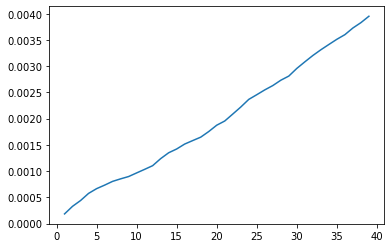

In [15]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

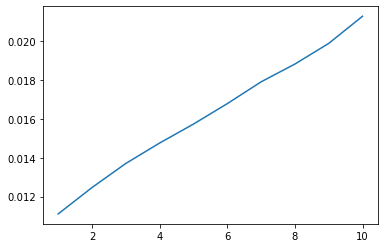

In [16]:
iter_list = []
result_list = []

for i in range(0, len(pi_result)):
    iter_list.append(pi_result[i]['Iteration'])
    result_list.append(pi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

#### How many iterations does it take to converge? 


In [17]:
print("Policy Iteration", pi_result[-1]['Iteration'])
print("Value Iteration", vi_result[-1]['Iteration'])

Policy Iteration 10
Value Iteration 39


#### Which one converges faster?

In [18]:
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))

time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))


Policy Iteration Time: 0.16238856315612793
Value Iteration Time: 0.07736992835998535


#### How did you choose to define convergence?

The defaults 

#### Do they converge to the same answer?

In [19]:
vi.policy == pi.policy

True

#### Which converged to a higher reward?

In [20]:
print("Policy Iteration", pi_result[-1]['Reward'])
print("Value Iteration", vi_result[-1]['Reward'])

Policy Iteration 23.172433847048566
Value Iteration 23.089675091923866


#### How did the number of states affect things, if at all?

Policy Iteration: {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 1.7763568394002505e-15, 'Time': 0.010490894317626953, 'Max V': 23.172433847048566, 'Mean V': 5.704639509766346, 'Iteration': 10}
Value Iteartion: {'State': None, 'Action': None, 'Reward': 23.089675091923866, 'Error': 0.0013319585461291084, 'Time': 0.003331899642944336, 'Max V': 23.089675091923866, 'Mean V': 5.626418022627985, 'Iteration': 39}
QLearning: {'State': 80, 'Action': 0, 'Reward': 0.0, 'Error': 0.001432248798038201, 'Time': 126.53207230567932, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'Max V': 11.540872539061253, 'Mean V': 2.1146581828778053, 'Iteration': 5000000}


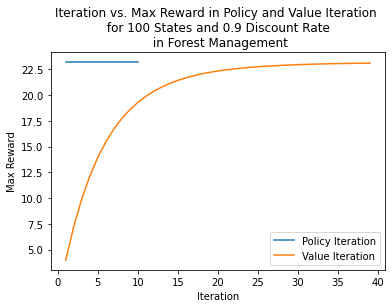

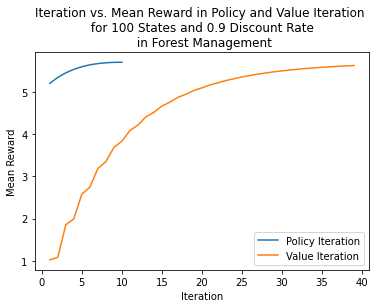

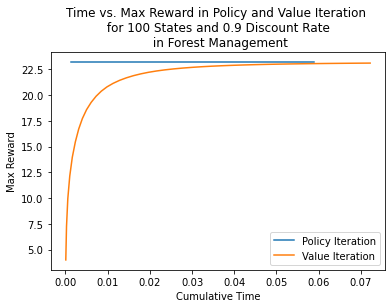

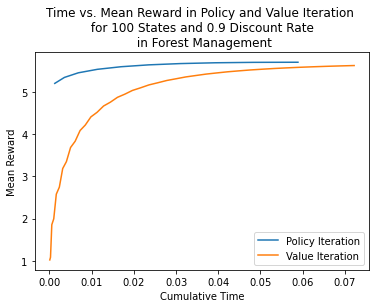

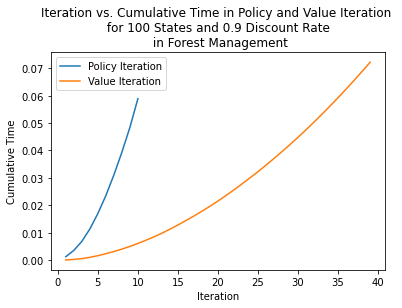

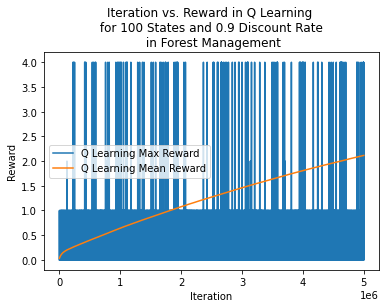

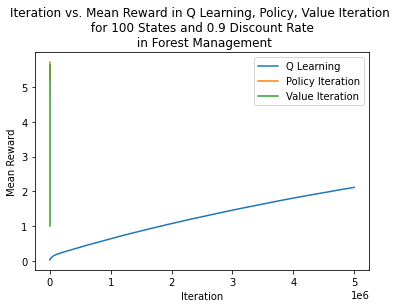

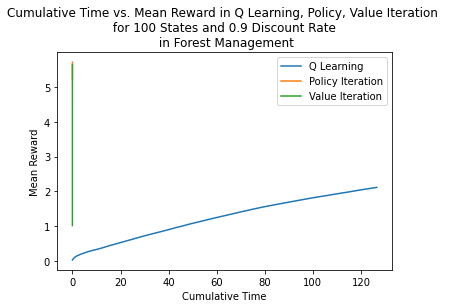

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 0.05887937545776367
Value Iteration Time: 0.07219243049621582
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.704639509766346
Value Iteration: 5.626418022627985
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [108]:
gamma = 0.90
numstates = 100

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(transitions = P, reward = R, gamma = gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteartion:",vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 5000000)
ql_result = ql.run()
print("QLearning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")


print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

Policy Iteration: {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 1.7763568394002505e-15, 'Time': 0.23858189582824707, 'Max V': 23.172433847048566, 'Mean V': 5.095325829429674, 'Iteration': 10}
Value Iteration: {'State': None, 'Action': None, 'Reward': 23.089675091923866, 'Error': 0.0013319585461291084, 'Time': 0.014995098114013672, 'Max V': 23.089675091923866, 'Mean V': 5.017559559264563, 'Iteration': 39}
Q Learning: {'State': 731, 'Action': 0, 'Reward': 0.0, 'Error': 2.556722321106602e-05, 'Time': 293.781485080719, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'Max V': 5.025934539815763, 'Mean V': 0.47926046970578334, 'Iteration': 10000000}


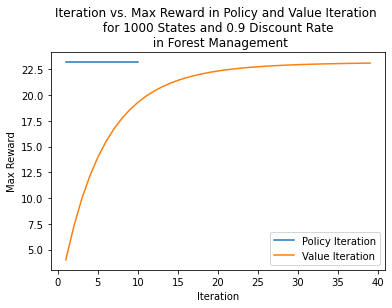

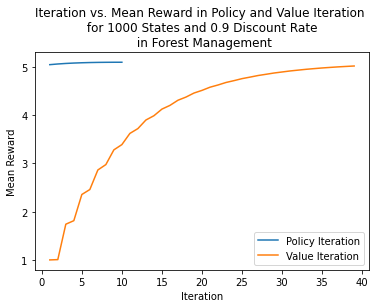

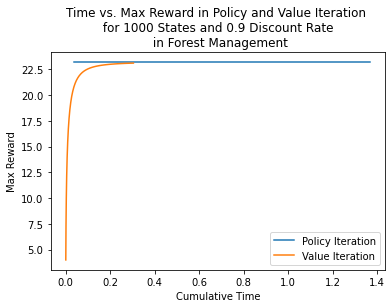

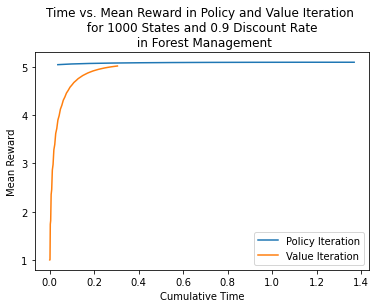

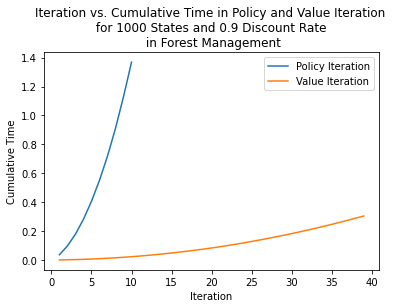

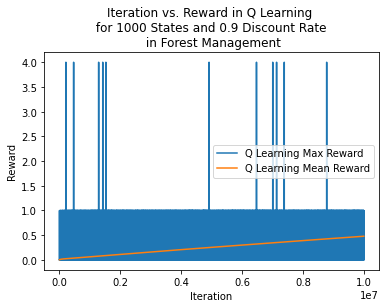

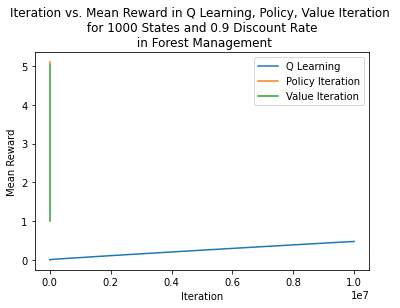

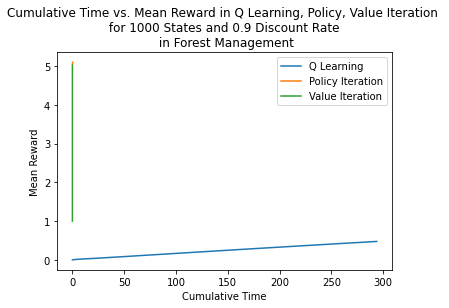

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 1.3677873611450195
Value Iteration Time: 0.3042895793914795
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.095325829429674
Value Iteration: 5.017559559264563
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
Which has less error??
Policy Iteration: 1.7763568394002505e-15
Value Iteration: 0.0013319585461291084
How did the number of states affect things, if at all?


In [109]:
numstates = 1000
gamma = 0.90

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteration:", vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000000)
ql_result = ql.run()
print("Q Learning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("Which has less error??")
print("Policy Iteration:", pi_result[-1]['Error'])
print("Value Iteration:", vi_result[-1]['Error'])

print("How did the number of states affect things, if at all?")

#print("Policy")
#print(pi.policy)

Forest on 10,000 States

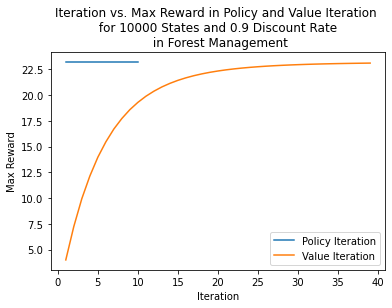

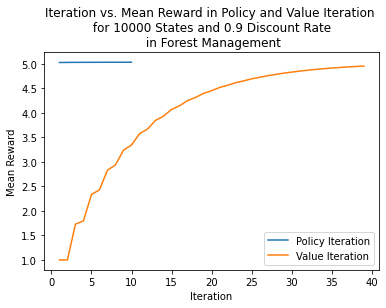

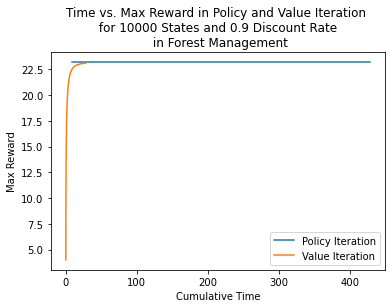

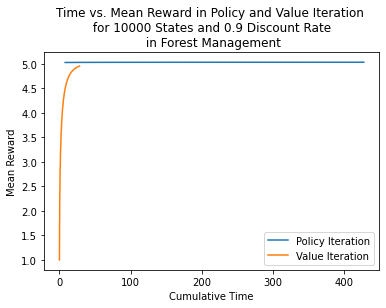

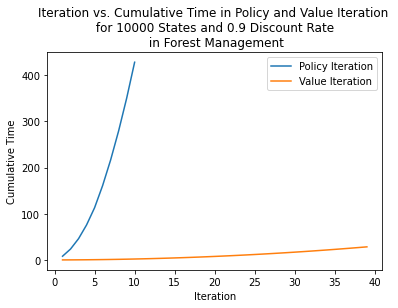

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 427.7650921344757
Value Iteration Time: 28.29868245124817
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.0343944613960065
Value Iteration: 4.956673712928221
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [23]:
P, R = hiive.mdptoolbox.example.forest(S = 10000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 10000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

#### Use Base Case of 1000 States, Build up Dictionary for Parameter Tuning

Policy & Value Iteration: Gamma Tuning

In [24]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

#learning_rates = np.arange(0.90, 1.0, 0.01)
gammas = np.arange(0.90, 1.0, 0.01)

pi_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}



for gamma in gammas:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, gamma)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 5000000)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
        
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    pi_LR_dict_FM['Gamma'].append(gamma)
    pi_LR_dict_FM['Iteration'].append(pi_iter_list)
    pi_LR_dict_FM['rewards'].append(pi_reward_list)
    pi_LR_dict_FM['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FM['Max V'].append(pi_max_v_list)
    pi_LR_dict_FM['Error'].append(pi_error_list)
    pi_LR_dict_FM['Time'].append(pi_time_list)
    
    vi_LR_dict_FM['Gamma'].append(gamma)
    vi_LR_dict_FM['Iteration'].append(vi_iter_list)
    vi_LR_dict_FM['rewards'].append(vi_reward_list)
    vi_LR_dict_FM['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FM['Max V'].append(vi_max_v_list)
    vi_LR_dict_FM['Error'].append(vi_error_list)
    vi_LR_dict_FM['Time'].append(vi_time_list)
    
    ql_LR_dict_FM['Gamma'].append(gamma)
    ql_LR_dict_FM['Iteration'].append(ql_iter_list)
    ql_LR_dict_FM['rewards'].append(ql_reward_list)
    ql_LR_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FM['Max V'].append(ql_max_v_list)
    ql_LR_dict_FM['Error'].append(ql_error_list)
    ql_LR_dict_FM['Time'].append(ql_time_list)

Q-Learning: Gamma Tuning

In [110]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)
gammas = np.arange(0.90, 1.0, 0.01)

ql_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}

for gamma in gammas:

    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 5000000)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    ql_LR_dict_FM['Gamma'].append(gamma)
    ql_LR_dict_FM['Iteration'].append(ql_iter_list)
    ql_LR_dict_FM['rewards'].append(ql_reward_list)
    ql_LR_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FM['Max V'].append(ql_max_v_list)
    ql_LR_dict_FM['Error'].append(ql_error_list)
    ql_LR_dict_FM['Time'].append(ql_time_list)

Q - Learning : Alpha Tuning

In [170]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)
           
gamma = .90
alphas = [0.01, 0.10, 0.20, 0.30]
apha_results = []

ql_alpha_dict_FM = {
    'Alpha' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[],
    'Result':[],
    'AlphaList':[],
    'EpsilonList':[]
}

for alpha in alphas:
    print("alpha:", alpha)
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 5000000, alpha = alpha)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    ql_result_list = []
    ql_alpha_list = []
    ql_epsilon_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
        ql_alpha_list.append(ql_result[i]['Alpha'])
        ql_epsilon_list.append(ql_result[i]['Epsilon'])
        
    
    ql_alpha_dict_FM['Alpha'].append(alpha)
    ql_alpha_dict_FM['Iteration'].append(ql_iter_list)
    ql_alpha_dict_FM['rewards'].append(ql_reward_list)
    ql_alpha_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_alpha_dict_FM['Max V'].append(ql_max_v_list)
    ql_alpha_dict_FM['Error'].append(ql_error_list)
    ql_alpha_dict_FM['Time'].append(ql_time_list)
    ql_alpha_dict_FM['AlphaList'].append(ql_alpha_list)
    ql_alpha_dict_FM['EpsilonList'].append(ql_epsilon_list)

alpha: 0.01
alpha: 0.1
alpha: 0.2
alpha: 0.3


Policy Iteration

In [158]:
def plot_parameter_tuning(results, hyperparam, x_var, y_var, title):
    
    for i in range(0, len(results[hyperparam])):
        label = results[hyperparam][i]
        label = np.around(label, 2)
        label = '{:.1%}'.format(label)
        
        x = results[x_var][i]
        y = results[y_var][i]
        if y_var == "Time":
            y = list(accumulate(y))
        plt.plot(x, y, label = label)

    plt.title("The Effect of " + hyperparam + " on " + y_var + " over " + x_var +"\n" + title)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title = hyperparam, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', fancybox=True)
    plt.show()


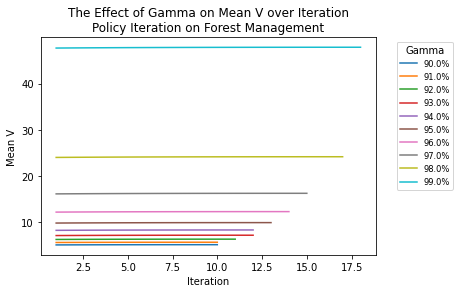

In [26]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Policy Iteration on Forest Management")

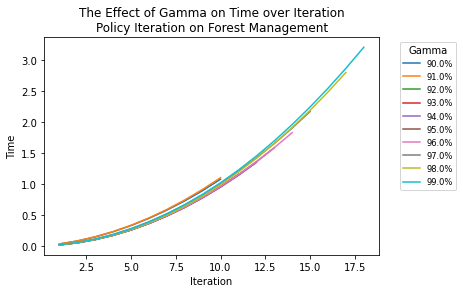

In [27]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Time", "Policy Iteration on Forest Management")

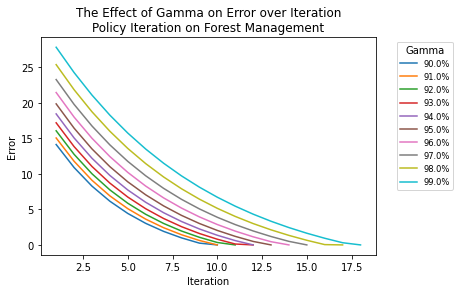

In [28]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Error", "Policy Iteration on Forest Management")

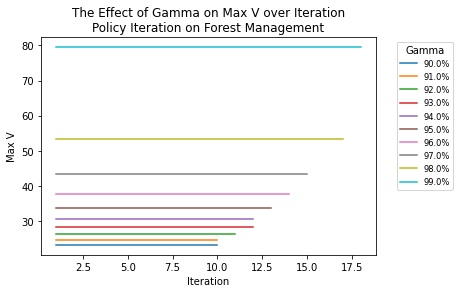

In [29]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Max V", "Policy Iteration on Forest Management")

Value Iteration

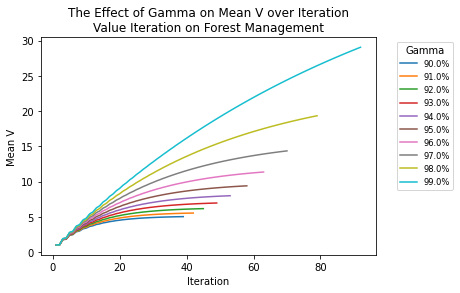

In [30]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Value Iteration on Forest Management")

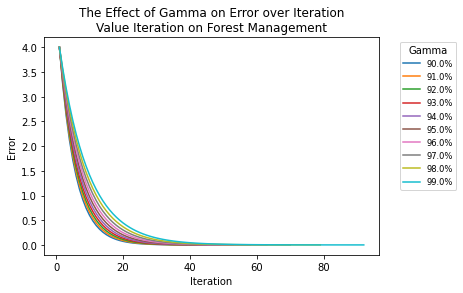

In [31]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Error", "Value Iteration on Forest Management")

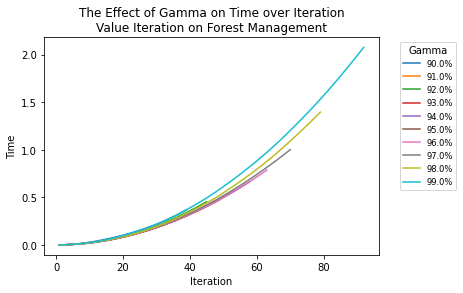

In [32]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Time", "Value Iteration on Forest Management")

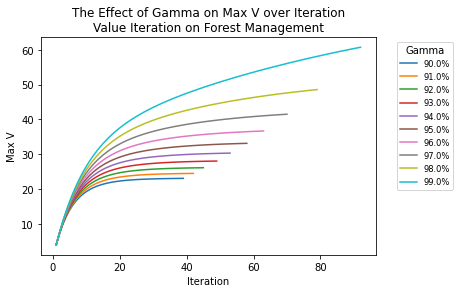

In [33]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Max V", "Value Iteration on Forest Management")

Q-Learning

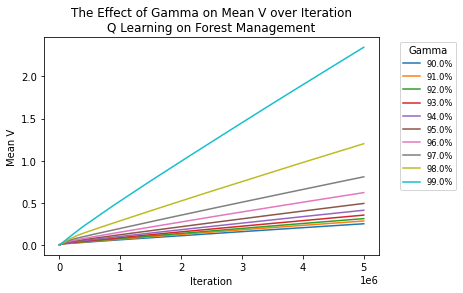

In [118]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Q Learning on Forest Management")

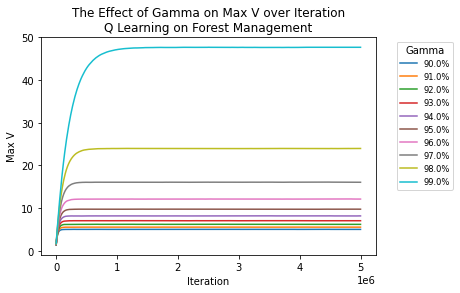

In [119]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Max V", "Q Learning on Forest Management")

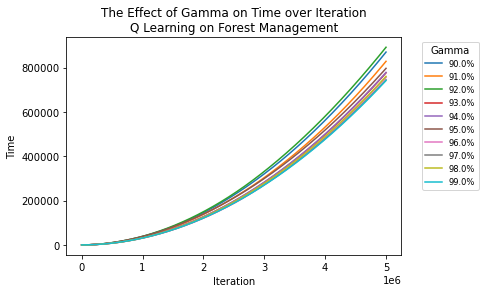

In [120]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Time", "Q Learning on Forest Management")

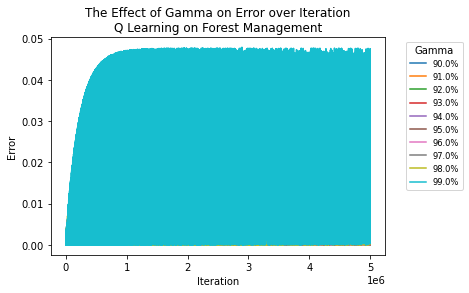

In [121]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Error", "Q Learning on Forest Management")

Q - Learning Alpha

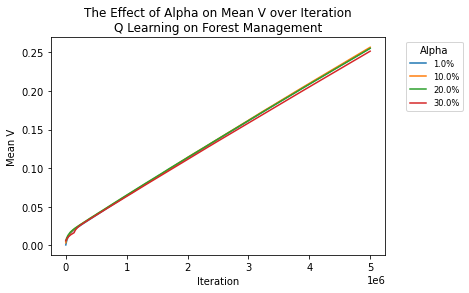

In [173]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Mean V", "Q Learning on Forest Management")

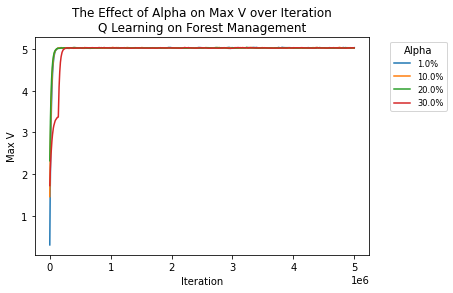

In [174]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Max V", "Q Learning on Forest Management")

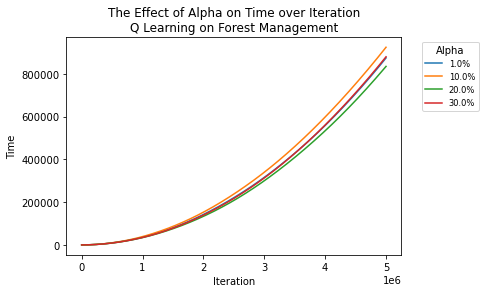

In [176]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Time", "Q Learning on Forest Management")

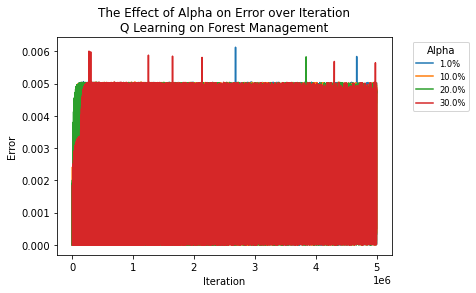

In [175]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Error", "Q Learning on Forest Management")

### Frozen Lake (Grid World Problem)

Actions: 4
Size: 16


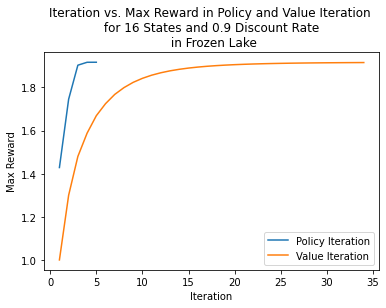

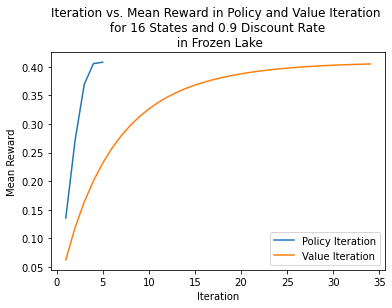

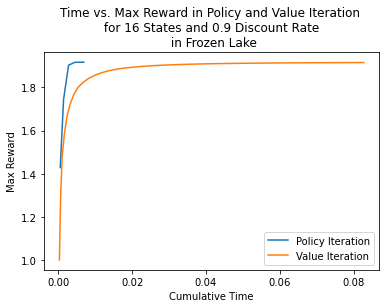

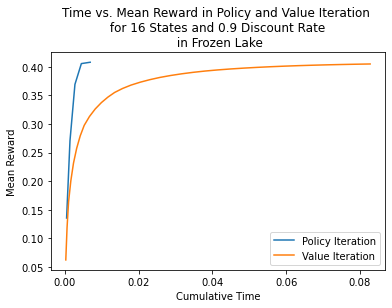

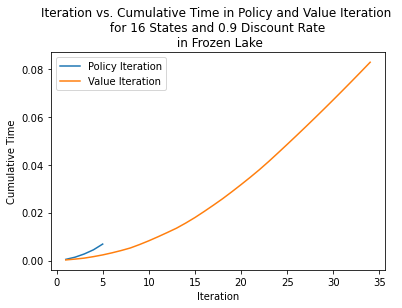

How many iterations does it take to converge?
Policy Iteration: 5
Value Iteration: 34
Which one converges faster? Why?
Policy Iteration Time: 0.006865501403808594
Value Iteration Time: 0.08276033401489258
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 0.4080172982800236
Value Iteration: 0.4049871614918687
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
How did the number of states affect things, if at all?


In [34]:
env = gym.make("FrozenLake-v0")

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, n_states, 0.9, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

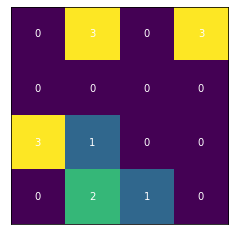

In [122]:

policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(4, 4)

reshaped_array

#plt.imshow(reshaped_array, interpolation='nearest')
#plt.show()

fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# We want to show all ticks...
ax.set_xticks(())
ax.set_yticks(())
# ... and label them with the respective list entries
ax.set_xticklabels(())
ax.set_yticklabels(())


# Loop over data dimensions and create text annotations.
for i in range(0, 4):
    for j in range(0, 4):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w")
        
plt.plot("Policy for Frozen Lake")

Actions: 4
Size: 16
PI Final Result: {'State': None, 'Action': None, 'Reward': 1.9170604443558334, 'Error': 2.220446049250313e-16, 'Time': 0.0034067630767822266, 'Max V': 1.9170604443558334, 'Mean V': 0.4080172982800236, 'Iteration': 5}
VI Final Result: {'State': None, 'Action': None, 'Reward': 1.9156384309573595, 'Error': 0.0010762861228731102, 'Time': 0.003386974334716797, 'Max V': 1.9156384309573595, 'Mean V': 0.4049871614918687, 'Iteration': 34}
QL Final Result: {'State': 10, 'Action': 0, 'Reward': 0.0, 'Error': 0.00044058696522082566, 'Time': 159.36417698860168, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'Max V': 1.7075164584692382, 'Mean V': 0.2521551836966067, 'Iteration': 5000000}


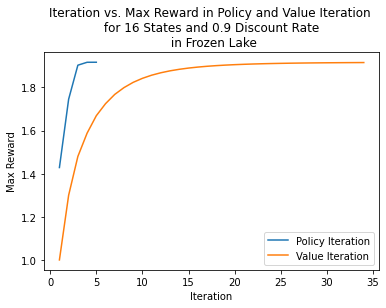

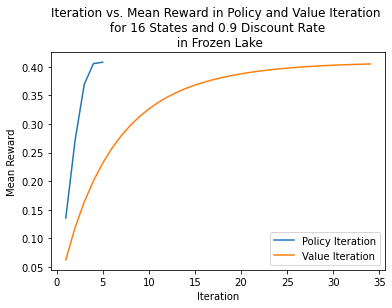

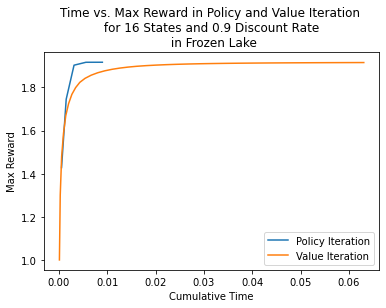

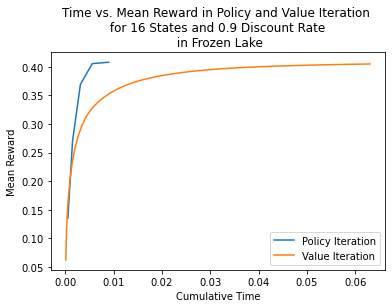

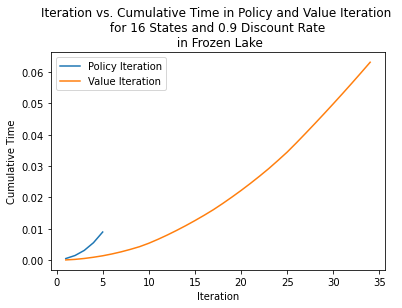

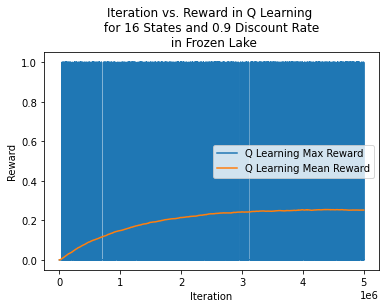

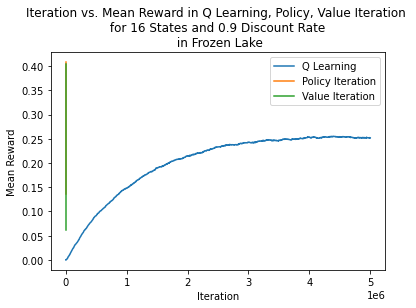

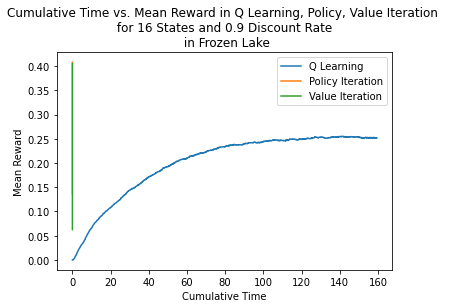

How many iterations does it take to converge?
Policy Iteration: 5
Value Iteration: 34
Which one converges faster? Why?
Policy Iteration Time: 0.008977651596069336
Value Iteration Time: 0.06309986114501953
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 0.4080172982800236
Value Iteration: 0.4049871614918687
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
How did the number of states affect things, if at all?
The policy:
(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


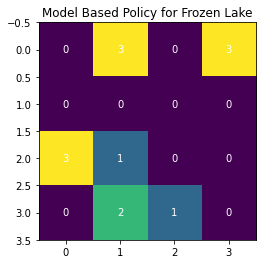

[[1 3 0 0]
 [0 0 0 0]
 [2 0 0 0]
 [0 1 2 0]]


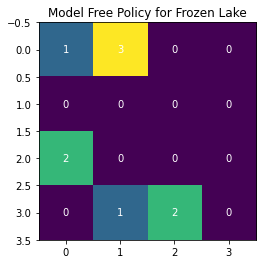

In [104]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .90
pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
print("PI Final Result:",pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
vi_result = vi.run()
print("VI Final Result:", vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
ql_result = ql.run()
print("QL Final Result:", ql_result[-1])

####################

compare_reward(pi_result, vi_result, ql_result, n_states, gamma, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

print("The policy:")
print(pi.policy)
board_size = math.sqrt(n_states)
board_size = int(board_size)

policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels(())
ax.set_yticklabels(())
fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w") 
plt.title("Model Based Policy for Frozen Lake")
plt.show()

policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels(())
ax.set_yticklabels(())
fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w") 
plt.title("Model Free Policy for Frozen Lake")
plt.show()

Actions: 4
Size: 64


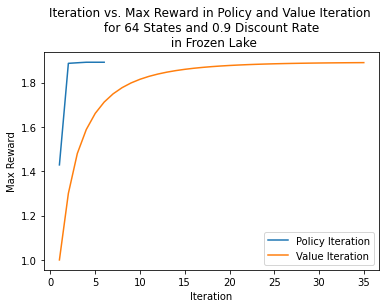

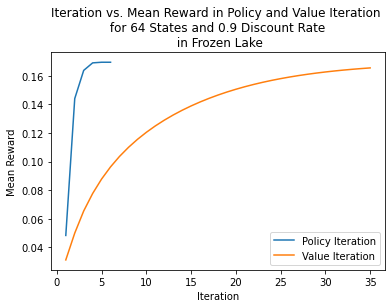

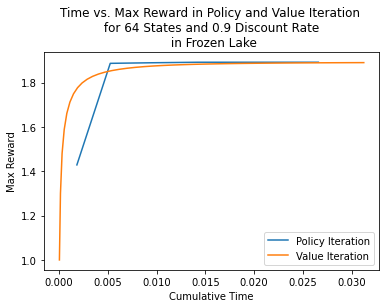

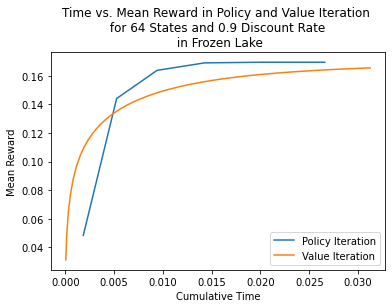

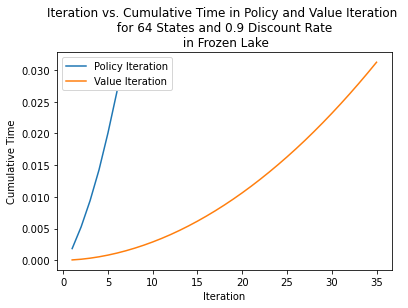

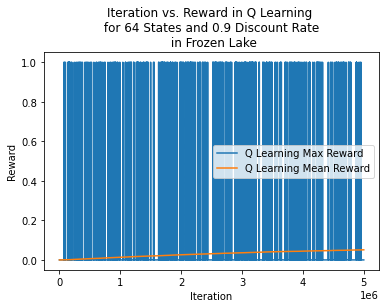

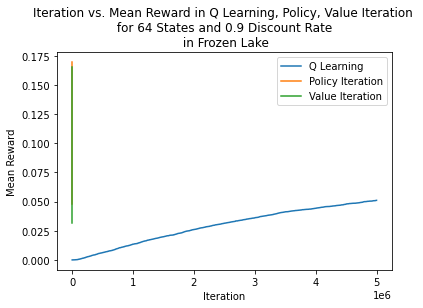

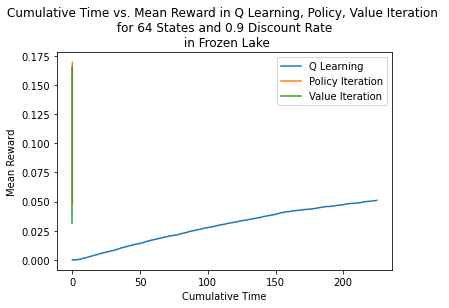

How many iterations does it take to converge?
Policy Iteration: 6
Value Iteration: 35
Which one converges faster? Why?
Policy Iteration Time: 0.02658247947692871
Value Iteration Time: 0.031238555908203125
Do they converge to the same answer?
False
To what Mean Value do they converge?
Policy Iteration: 0.16949846785592668
Value Iteration: 0.16553352000492866
To what Max Value do they converge?
Policy Iteration: 1.8915413942845958
Value Iteration: 1.8898245217404024
To what Max Value do they converge?
Policy Iteration: 1.8915413942845958
Value Iteration: 1.8898245217404024
How did the number of states affect things, if at all?
The policy:
(3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0)
[[3 2 2 2 2 2 2 2]
 [3 3 3 3 2 2 2 1]
 [3 3 0 0 2 3 2 1]
 [3 3 3 1 0 0 2 1]
 [3 3 0 0 2 1 3 2]
 [0 0 0 1 3 0 0 2]
 [0 0 1 0 0 0 0 2]
 [0 1 0 0 1 1 1 0]]


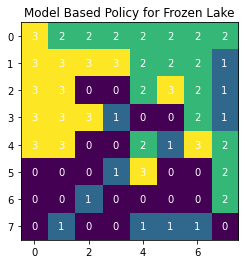

[[2 1 1 3 3 2 2 0]
 [0 0 0 1 3 2 3 0]
 [0 0 0 0 1 1 0 0]
 [2 3 1 3 0 0 1 0]
 [0 0 0 0 1 1 2 0]
 [3 0 0 1 2 2 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 2 0 1 3 1 0]]


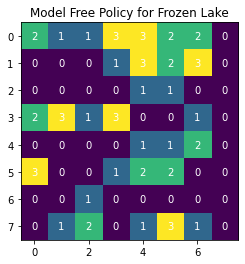

In [105]:
env = gym.make("FrozenLake-v0", map_name = "8x8", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, 0.9, n_iter = 5000000)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, ql_result, n_states, 0.9, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

print("The policy:")
print(pi.policy)

board_size = math.sqrt(n_states)
board_size = int(board_size)

policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels(())
ax.set_yticklabels(())
fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w") 
plt.title("Model Based Policy for Frozen Lake")
plt.show()

policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels(())
ax.set_yticklabels(())
fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w") 
plt.title("Model Free Policy for Frozen Lake")
plt.show()

#### Make Dictionary of Parameter Tuning

In [39]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

#learning_rates = np.arange(0.90, 1.0, 0.01)
gammas = np.arange(0.90, 1.0, 0.01)

pi_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
for gamma in gammas:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
    
    pi_LR_dict_FL['Gamma'].append(gamma)
    pi_LR_dict_FL['Iteration'].append(pi_iter_list)
    pi_LR_dict_FL['rewards'].append(pi_reward_list)
    pi_LR_dict_FL['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FL['Max V'].append(pi_max_v_list)
    pi_LR_dict_FL['Error'].append(pi_error_list)
    pi_LR_dict_FL['Time'].append(pi_time_list)
    
    
    vi_LR_dict_FL['Gamma'].append(gamma)
    vi_LR_dict_FL['Iteration'].append(vi_iter_list)
    vi_LR_dict_FL['rewards'].append(vi_reward_list)
    vi_LR_dict_FL['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FL['Max V'].append(vi_max_v_list)
    vi_LR_dict_FL['Error'].append(vi_error_list)
    vi_LR_dict_FL['Time'].append(vi_time_list)
    
    

Actions: 4
Size: 16


Parameter Dict for Q Learner 

In [111]:
env = gym.make("FrozenLake-v0", is_slippery = True)
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward

gammas = np.arange(0.90, 1.0, 0.01)

ql_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}

for gamma in gammas:

    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    ql_LR_dict_FL['Gamma'].append(gamma)
    ql_LR_dict_FL['Iteration'].append(ql_iter_list)
    ql_LR_dict_FL['rewards'].append(ql_reward_list)
    ql_LR_dict_FL['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FL['Max V'].append(ql_max_v_list)
    ql_LR_dict_FL['Error'].append(ql_error_list)
    ql_LR_dict_FL['Time'].append(ql_time_list)

Actions: 4
Size: 16


Value Iteration

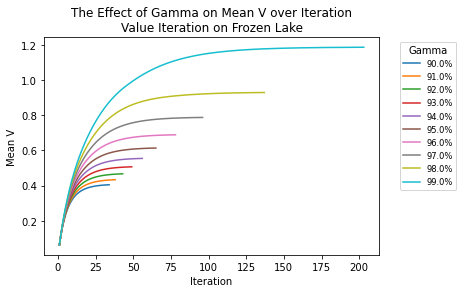

In [40]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Value Iteration on Frozen Lake")

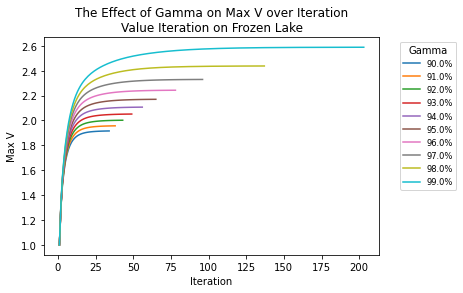

In [41]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Max V", "Value Iteration on Frozen Lake")

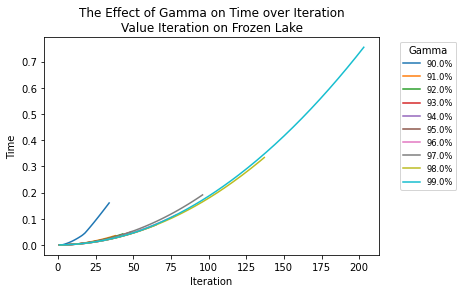

In [42]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Time", "Value Iteration on Frozen Lake")

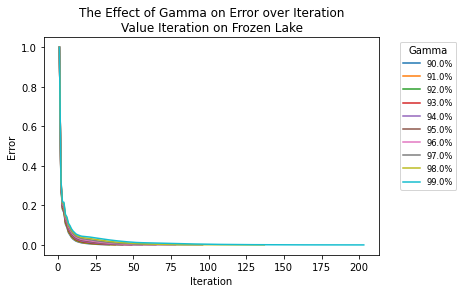

In [43]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Error", "Value Iteration on Frozen Lake")

Policy Iteration

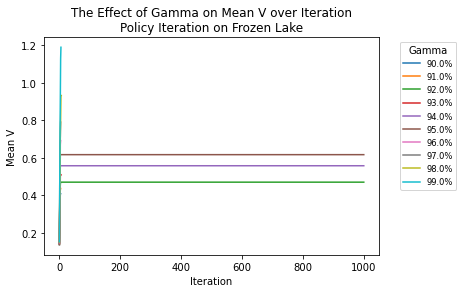

In [44]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Policy Iteration on Frozen Lake")

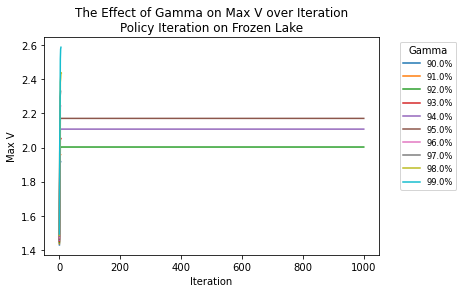

In [45]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Max V", "Policy Iteration on Frozen Lake")

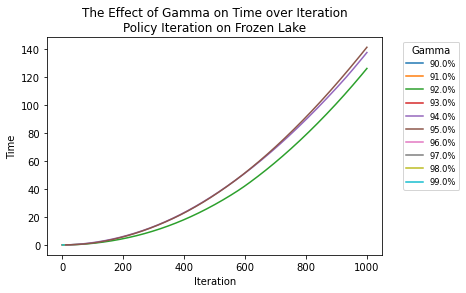

In [46]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Time", "Policy Iteration on Frozen Lake")

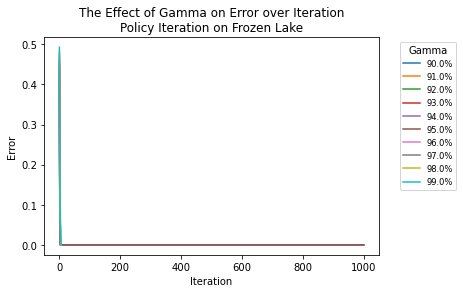

In [47]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Error", "Policy Iteration on Frozen Lake")

Q Learning

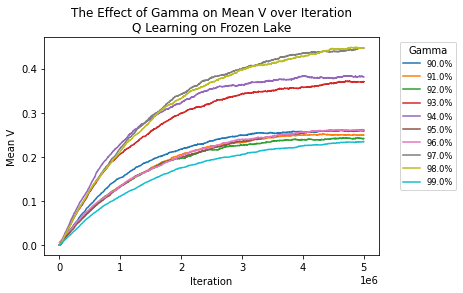

In [113]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Q Learning on Frozen Lake")

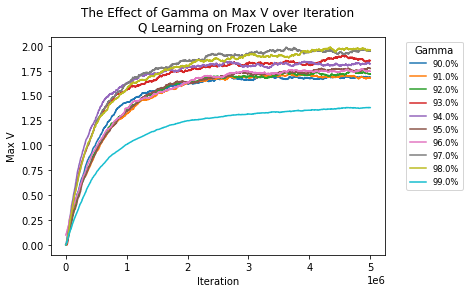

In [115]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Max V", "Q Learning on Frozen Lake")

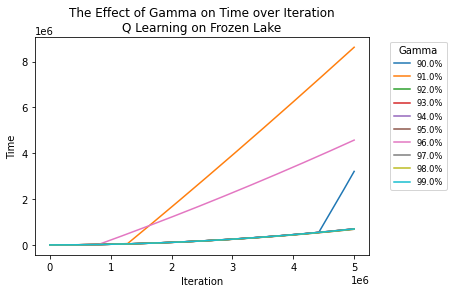

In [117]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Time", "Q Learning on Frozen Lake")

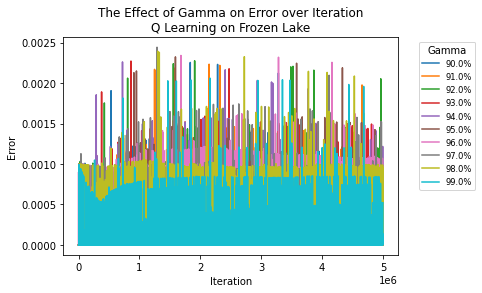

In [116]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Error", "Q Learning on Frozen Lake")

In [123]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .90
pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
pi_result = pi.run()
pi.setVerbose()

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
vi_result = vi.run()

eps = .01
alpha = .7
ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
ql_result = ql.run()
print(ql_result[-1])

print(ql.Q)
print(ql.policy)
ql.V

# Check - Does Q Transition Matrix rows add up to 1?
for i in range(0, len(ql.Q)):
    print(sum(ql.Q[i]))

Actions: 4
Size: 16
{'State': 12, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 159.58572006225586, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'Max V': 1.4468410527650923, 'Mean V': 0.2651679642346114, 'Iteration': 5000000}
[[0.08403679 0.03781615 0.03601256 0.03248148]
 [0.0096629  0.01578801 0.05048785 0.01812153]
 [0.1188168  0.03731913 0.04291846 0.02098127]
 [0.04687707 0.00472805 0.00149466 0.00365714]
 [0.11351893 0.04463276 0.03933315 0.03015885]
 [0.         0.         0.         0.        ]
 [0.22778349 0.06218276 0.07573463 0.01013145]
 [0.         0.         0.         0.        ]
 [0.03467275 0.0775862  0.1898123  0.0849853 ]
 [0.13764859 0.49810895 0.19429661 0.107639  ]
 [0.64924444 0.23198345 0.22084222 0.08222338]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.17262979 0.33230434 0.81715977 0.27181487]
 [0.30971906 0.66410999 0.65989522 1.44684105]
 [0.         0.         0.         0.        ]]
(0, 2, 0, 0, 0, 

In [85]:
# Check - Does Q Transition Matrix rows add up to 1?
for i in range(0, len(ql.Q)):
    print(sum(ql.Q[i]))

0.036073723534619094
0.02727360502415931
0.11816375397789118
0.043159654923812595
0.055280926084812006
0.0
0.21359138471880473
0.0
0.16239428471622297
0.5290414529763976
0.7149953221927402
0.0
0.0
1.1332892312037217
2.373512477677025
0.0


[[0 1 2 0]
 [1 0 0 0]
 [1 0 1 0]
 [0 2 3 0]]


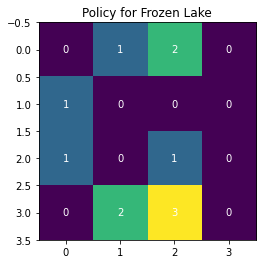

In [86]:
board_size = math.sqrt(16)
board_size = int(board_size)
policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

# We want to show all ticks...
ax.set_xticks(())
ax.set_yticks(())
# ... and label them with the respective list entries
ax.set_xticklabels(())
ax.set_yticklabels(())

fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w")
        
plt.title("Policy for Frozen Lake")
plt.show()

In [146]:
ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma = 0.8, alpha = .01, epsilon = 0.01)
ql_result = ql.run()

ql_result[-1]
#ql.Q

{'State': 5,
 'Action': 1,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 0.4196610450744629,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.8,
 'Max V': 0.0,
 'Mean V': 0.0,
 'Iteration': 10000}

In [153]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.8, epsilon = 0.01)
vi_result = vi.run()
print(vi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.8, epsilon = 0.1)
vi_result = vi.run()
print(vi_result[-1])

{'State': None, 'Action': None, 'Reward': 14.863208550459333, 'Error': 0.002906530688611575, 'Time': 0.013253927230834961, 'Max V': 14.863208550459333, 'Mean V': 2.691430230348521, 'Iteration': 23}
{'State': None, 'Action': None, 'Reward': 14.751778651436618, 'Error': 0.02897660080563691, 'Time': 0.009335041046142578, 'Max V': 14.751778651436618, 'Mean V': 2.6366510861775336, 'Iteration': 16}


#### Explore Alpha

In [165]:
env = gym.make("FrozenLake-v0", is_slippery = True)
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .90
alphas = [0.01, 0.10, 0.20, 0.30]
apha_results = []

ql_alpha_dict_FL = {
    'Alpha' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[],
    'Result':[],
    'AlphaList':[],
    'EpsilonList':[]
}

for alpha in alphas:
    print("alpha:", alpha)
    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000, alpha = alpha)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    ql_result_list = []
    ql_alpha_list = []
    ql_epsilon_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
        ql_alpha_list.append(ql_result[i]['Alpha'])
        ql_epsilon_list.append(ql_result[i]['Epsilon'])
        
    
    ql_alpha_dict_FL['Alpha'].append(alpha)
    ql_alpha_dict_FL['Iteration'].append(ql_iter_list)
    ql_alpha_dict_FL['rewards'].append(ql_reward_list)
    ql_alpha_dict_FL['Mean V'].append(ql_mean_v_list)
    ql_alpha_dict_FL['Max V'].append(ql_max_v_list)
    ql_alpha_dict_FL['Error'].append(ql_error_list)
    ql_alpha_dict_FL['Time'].append(ql_time_list)
    ql_alpha_dict_FL['AlphaList'].append(ql_alpha_list)
    ql_alpha_dict_FL['EpsilonList'].append(ql_epsilon_list)
    


Actions: 4
Size: 16
alpha: 0.01
alpha: 0.1
alpha: 0.2
alpha: 0.3


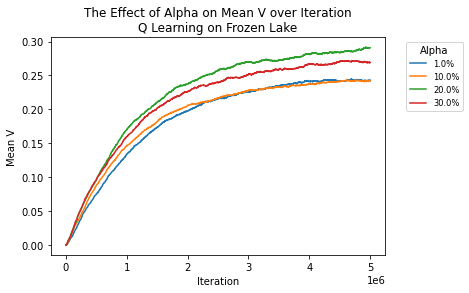

In [166]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Mean V", "Q Learning on Frozen Lake")

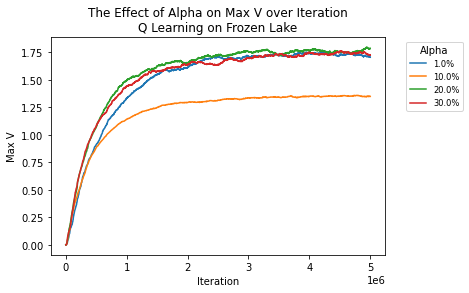

In [167]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Max V", "Q Learning on Frozen Lake")

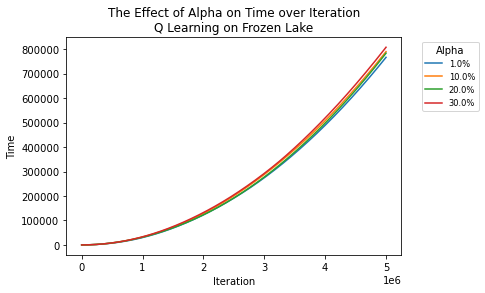

In [168]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Time", "Q Learning on Frozen Lake")

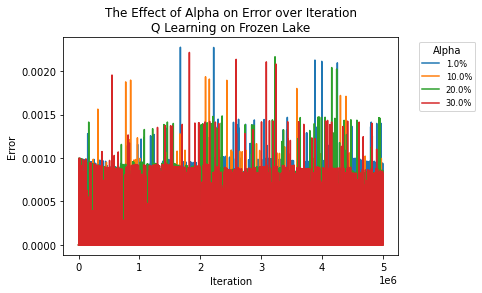

In [169]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Error", "Q Learning on Frozen Lake")